In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data preparation

In [7]:
mean_01 = np.array([1,.5])
cov_01 = np.array([[1, .1], [.1, .2]])

mean_02 = np.array([4, 5])
cov_02 = np.array([[1.21, .1], [.1, 1.3]])

In [13]:
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 400)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 400)

visualise


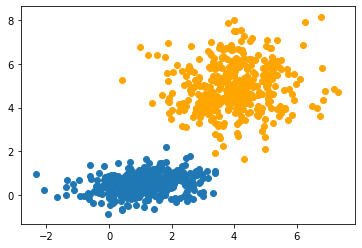

In [14]:
plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = 'orange')
plt.show()

In [20]:
total = dist_01.shape[0] + dist_02.shape[0]

data = np.zeros((total, 3))
data[:400, :-1] = dist_01
data[400:, :-1] = dist_02
data[400:, -1] = 1

In [22]:
np.random.shuffle(data)
print(data)

[[4.78994962 3.9729123  1.        ]
 [1.07990873 0.95531729 0.        ]
 [3.4034568  1.12673453 0.        ]
 ...
 [2.89285153 3.70344019 1.        ]
 [5.09717805 5.06841858 1.        ]
 [3.87778877 5.69608651 1.        ]]


In [23]:
x_train = data[:600, :-1]
y_train = data[:600, -1]

x_test = data[600:, :-1]
y_test = data[600:, -1]

Algorithm

In [24]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-.1*z))

In [ ]:
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))